# **Week 11: Simple Linear Regression**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```

In this workshop, we will explore how to perform linear regression in R through practical exercises.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [113]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

**Do not modify the following**

In [114]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Test passed 🥇


## **Simple Linear Regression Model**

We have already introduced simple linear regression in the bivariate data summary workshop/lecture. This workshop content will go a bit deeper and focus on:

- Performing hypothesis tests for regression parameters
- Interpreting key quantities from `lm()` model outputs
- Computing confidence intervals and prediction intervals
- Interpreting diagnostic plots to assess model fit


### **Fitting Simple Linear Regression Models in R**

R provides the `lm()` function for fitting linear regression models. It has a formula interface, similar to `aov()`, `t.test()`, and other modeling functions in R. Linear models are very flexible and can be used for simple regression, multiple regression, and even ANOVA (since ANOVA is a special case of a linear model).




**Usage:**

```r
lm(formula,
   data = NULL,
   subset = NULL,
   weights = NULL,
   na.action = na.omit,
   ...)
```


**Arguments:**

- `formula`: a model formula of the form `response ~ predictors` (e.g., `y ~ x` for simple linear regression.)  
- `data`: a data frame containing the variables in the model  
- `subset`: an optional vector specifying a subset of observations to be used  
- `weights`: an optional vector of weights for weighted regression  
- `na.action`: a function that indicates what should happen when the data contain `NA`s (default is `na.omit`)  
- `...`: additional arguments passed to lower-level modeling functions  

### **"Reading" `lm` Objects**

The output of the `lm()` function is an object of class `lm`. By default, printing this object displays only basic information, such as the call and the estimated coefficients.

Consider the `cars` example in `Mock-PST2.docx`. We are interested in studying the relationship between the speed of cars (in mph) and the distance required to stop (in feet). To explore this relationship, we may fit a linear model using `lm()`.

In [115]:
model1 = lm(dist~speed, cars)
class(model1)
model1

[1] "lm"


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


Like objects returned by `t.test()` and `aov()`, an `lm` object can be summarised using `summary()` to obtain additional statistics, such as standard errors, t-values, and p-values.

In [116]:
summary(model1)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


#### **Exercise**

From the summary output of the `lm` object, answer the following questions:

- How much variability in stopping distance is explained by the linear model?  
- Interpret the *estimated* coefficient for `speed`. Is there any evidence that the linear relationship between speed and `dist` is statistically significant?



<details>
<summary>▶️ Click to show the solution</summary>

The amount of variability in stopping distance explained by the linear model is R squared, 65.11%.

The estimated coefficient for `speed` is 3.9324, implying that an additional mph in speed requires 3.9324 more feet to stop. This coefficient is statistically significant, as the p-value from the t-test is extremely small and smaller than any conventional threshold (e.g., 0.05).


</details>


Also, note that the F-test from the ANOVA of the model shows the same result. Is this always true?  

- **Yes**, for simple linear regression models.  
- **No**, for multiple linear regression models (out of the scope of this unit).  

In a regression model, the F-test is used to test whether all regression coefficients (excluding the intercept) are simultaneously equal to zero. For simple linear regression, since there is only one predictor, the F-test and the t-test for that coefficient are provably mathematically equivalent. One may obtain the F-test output using the `anova()` function.

In [117]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
speed,1,21185.46,21185.4589,89.56711,1.489836e-12
Residuals,48,11353.52,236.5317,NA,NA


### **Interval Estimation**

In linear regression, we often want to quantify the uncertainty in our predictions or in the estimated coefficients. Here, we will explore several common ones.


#### **Confidence Intervals for Regression Coefficients**  
This confidence interval reflects the uncertainty in estimating the relationship between the predictor and the response.  In R, you can compute confidence intervals for model coefficients using the `confint()` function:

In [118]:
  confint(model1, level = 0.95)

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


#### **Confidence Intervals for Mean Response**  

This confidence interval reflects the uncertainty in estimating the **expected response** conditioned on a regressor value. This expectation is a **FIXED** value.

In R, you can compute confidence intervals for the mean response using the `predict()` function with `interval = "confidence"`.

In [119]:
predict(model1, newdata = data.frame(speed = 20), interval = "confidence",  level = 0.95)

,fit,lwr,upr
1,61.06908,55.24729,66.89088


By default, if `newdata` is not supplied, the `predict()` function uses the predictor values from the original dataset (the ordering is preserved).


In [120]:
model1$fitted.values %>% head(10) %>% kable()
predict(model1, interval = "confidence") %>% head(10) %>% kable()



|         x|
|---------:|
| -1.849460|
| -1.849460|
|  9.947766|
|  9.947766|
| 13.880175|
| 17.812584|
| 21.744993|
| 21.744993|
| 21.744993|
| 25.677401|



|       fit|        lwr|       upr|
|---------:|----------:|---------:|
| -1.849460| -12.329543|  8.630624|
| -1.849460| -12.329543|  8.630624|
|  9.947766|   1.678977| 18.216556|
|  9.947766|   1.678977| 18.216556|
| 13.880175|   6.307527| 21.452823|
| 17.812584|  10.905121| 24.720047|
| 21.744993|  15.461917| 28.028068|
| 21.744993|  15.461917| 28.028068|
| 21.744993|  15.461917| 28.028068|
| 25.677401|  19.964525| 31.390278|

Remember `geom_smooth`? In `geom_smooth()`, the shaded area is by default a confidence interval for the mean response.

`geom_smooth()` using formula = 'y ~ x'


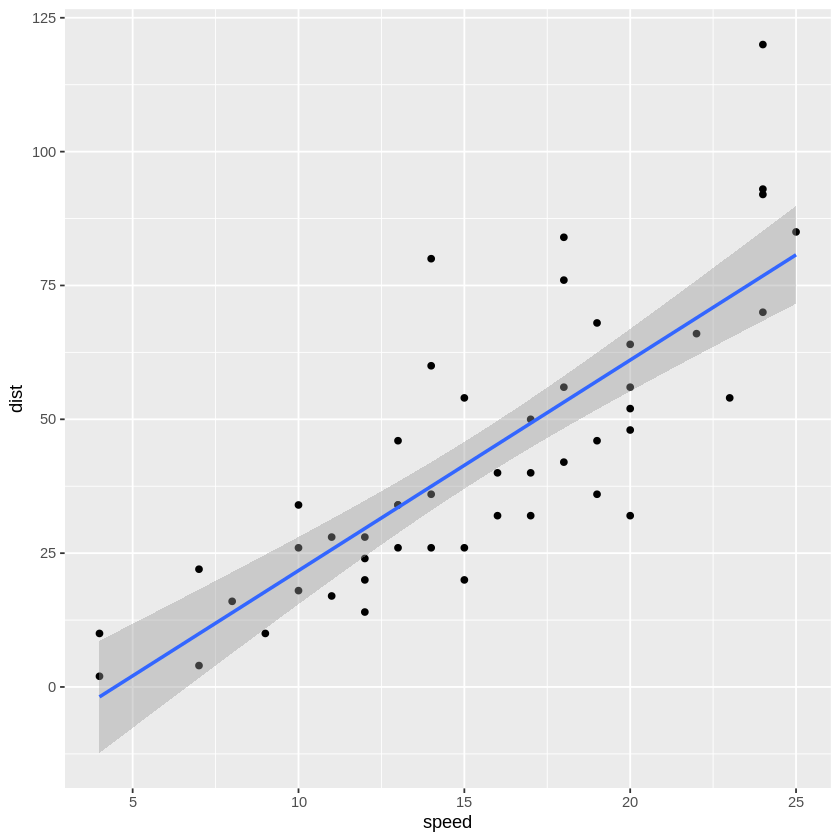

In [121]:
cars %>%
  ggplot(aes(x = speed, y = dist)) +
  geom_point()+
  geom_smooth(method = "lm")

#### **Predictive Intervals for *Future* Observations**

This is an entirely different concept from confidence intervals. Previously, when we talked about confidence intervals, we were estimating intervals for **fixed quantities** (e.g., the mean response).  

Predictive intervals, on the other hand, are for **random quantities** — they give a range where a future observation is likely to fall, with a specified coverage probability **before seeing the data**.  

For example, we may want to predict the value of `dist` for a new car with `speed = 20`. Here, we are not interested in the **average** `dist` but rather the value of `dist` for this specific case, which is a **RANDOM** quantity. That is why we are **predicting**, not estimating.


In R, you can compute confidence intervals for the mean response using the `predict()` function with `interval = "prediction"`.

In [122]:
predict(model1, newdata = data.frame(speed = 20), interval = "confidence",  level = 0.95)
predict(model1, newdata = data.frame(speed = 20), interval = "prediction",  level = 0.95)

,fit,lwr,upr
1,61.06908,55.24729,66.89088


,fit,lwr,upr
1,61.06908,29.60309,92.53507


Note the prediction intervals are wider; this is to account for additional uncertainty due to the randomness of the response variable.

### **Regression Diagnostics**

> Anscombe's quartet comprises four datasets that have nearly identical simple  descriptive statistics, yet have very different distributions and appear very different when graphed.

From [Anscombe's quartet - Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)



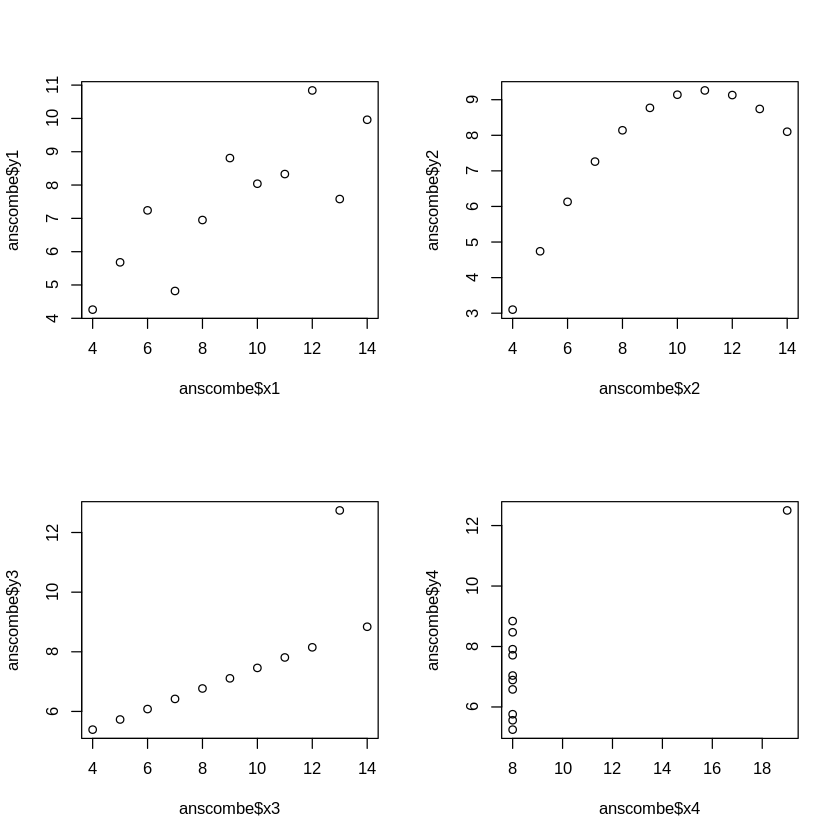

In [123]:
par(mfrow = c(2,2))

plot(anscombe$x1,anscombe$y1)
plot(anscombe$x2,anscombe$y2)
plot(anscombe$x3,anscombe$y3)
plot(anscombe$x4,anscombe$y4)

par(mfrow = c(1,1))

In [124]:
lm(y1~x1, anscombe) %>% summary()
cat("-------------------------------------------- \n")
lm(y2~x2, anscombe) %>% summary()
cat("-------------------------------------------- \n")
lm(y3~x3, anscombe) %>% summary()
cat("-------------------------------------------- \n")
lm(y4~x4, anscombe) %>% summary()


Call:
lm(formula = y1 ~ x1, data = anscombe)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
x1            0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217


-------------------------------------------- 



Call:
lm(formula = y2 ~ x2, data = anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.001      1.125   2.667  0.02576 * 
x2             0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002179


-------------------------------------------- 



Call:
lm(formula = y3 ~ x3, data = anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1586 -0.6146 -0.2303  0.1540  3.2411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0025     1.1245   2.670  0.02562 * 
x3            0.4997     0.1179   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6663,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002176


-------------------------------------------- 



Call:
lm(formula = y4 ~ x4, data = anscombe)

Residuals:
   Min     1Q Median     3Q    Max 
-1.751 -0.831  0.000  0.809  1.839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0017     1.1239   2.671  0.02559 * 
x4            0.4999     0.1178   4.243  0.00216 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6667,	Adjusted R-squared:  0.6297 
F-statistic:    18 on 1 and 9 DF,  p-value: 0.002165


These datasets have nearly identical simple descriptive statistics, yet, only the first dataset `(x1, y1)` resembles a linear relationship.

**However, many of the tools we have learnt in this class, such as sampling distributions of regression coefficients, hypothesis testing, and interval estimation are only reliable if regression assumptions are adequate (i.e., no substantial deviation from linear regression assumptions)**.

This highlights the importance of checking assumptions through regression diagnostics. In this unit, we mostly focus on the following assumptions: linearity, homoskedasticity, and normality.

#### **Linearity**

The simplest way to check the linearity assumption is through a scatter plot. One can plot the relationship between the variables and overlay the fitted regression line. In simple regression, non-linearity is usually easy to detect visually. For multiple regression, it becomes more difficult to assess linearity directly.


For example, in the `cars` dataset, it is clear that as `speed` increases, `dist` tends to increase approximately linearly. The fitted regression line captures this overall relationship, and the data points are scattered around the line, indicating a reasonable fit.


`geom_smooth()` using formula = 'y ~ x'


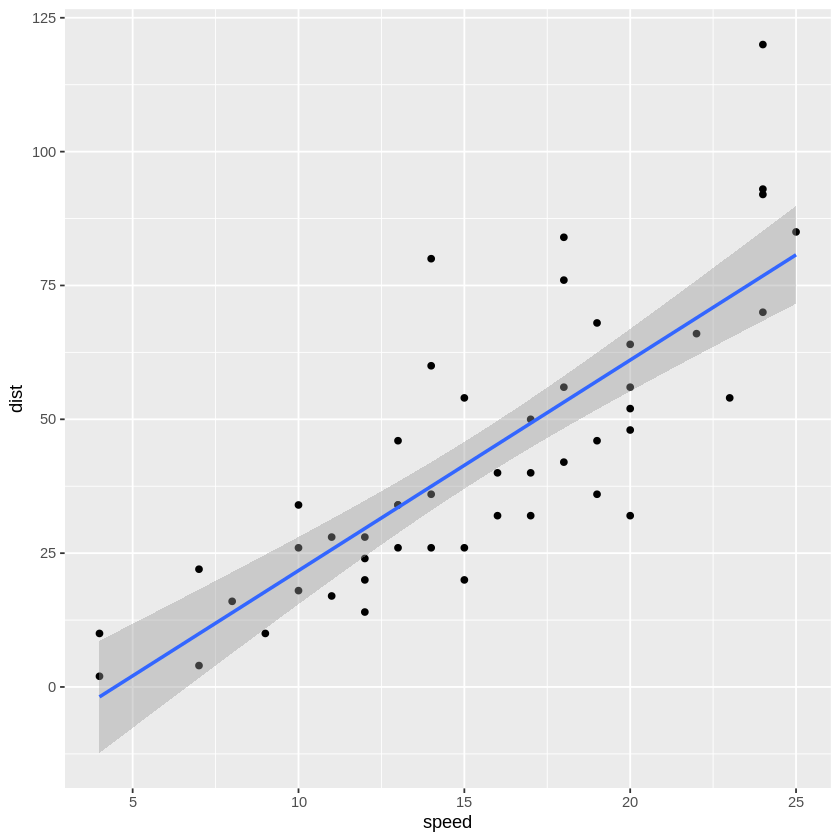

In [125]:
cars %>%
  ggplot(aes(x = speed, y = dist)) +
  geom_point() +
  geom_smooth(method = "lm")

Unlike the `cars` example, in `(x2,y2)` dataset in the `anscombe` example, the scatter plot resembles a quadratic relationship rather than a linear one. The fitted line does not capture the relationship between `x2` and `y2`.

`geom_smooth()` using formula = 'y ~ x'


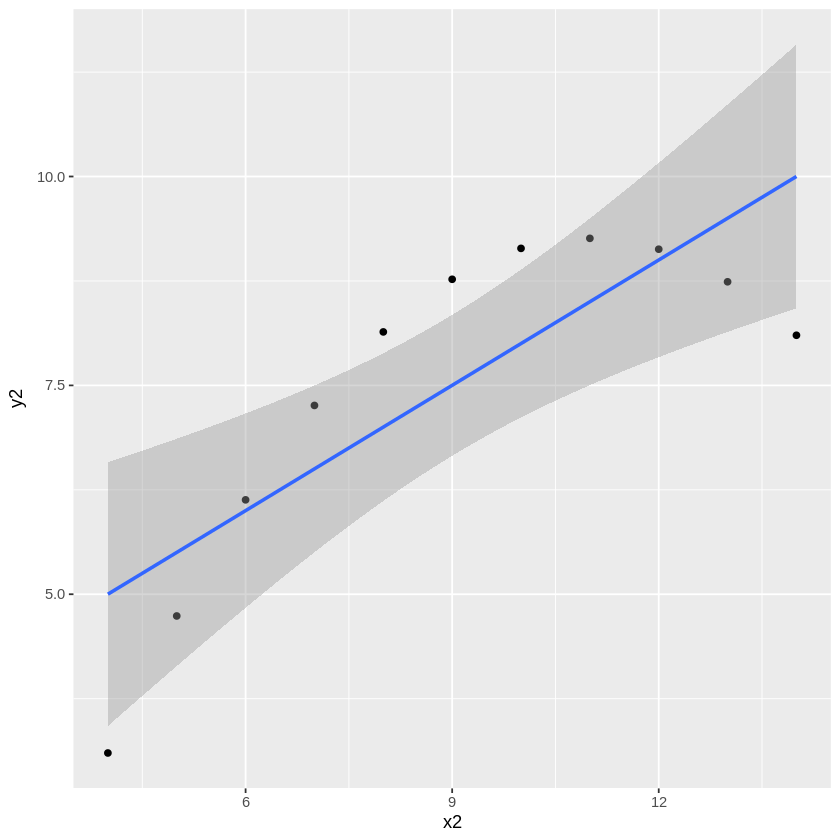

In [126]:
anscombe %>%
  ggplot(aes(x = x2, y = y2)) +
  geom_point() +
  geom_smooth(method = "lm")

When the assumptions of linear regression hold, we expect the data points to scatter around the fitted line. Another way to check for linearity is by plotting the residuals against the fitted values. If the linearity assumption is reasonable, the residuals should scatter randomly around the horizontal line at 0, regardless of the fitted values.

We can extract residuals & fitted values from an `lm` object and manually create a residuals vs. fitted values plot.


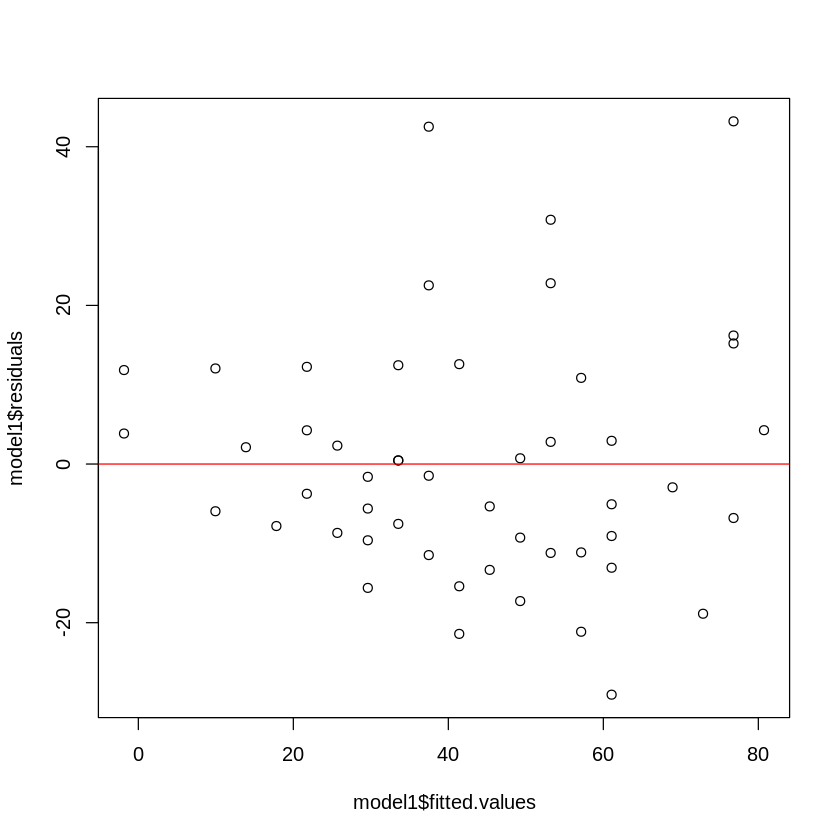

In [127]:
model1 = lm(dist~speed, cars)
plot(model1$fitted.values, model1$residuals)
abline(h = 0, col = "red")

Residuals seem to scatter around 0 here.

Another option (more recommended in practice) is to use built-in methods in R for regression diagnostics. We can simply run `plot(model1, which = 1)`. Here, `which = 1` tells `R` that you want a residuals vs fitted values plot.

This plot also includes a smooth curve (a moving average line) that shows the local average of the residuals, helping to detect any systematic deviations from linearity.

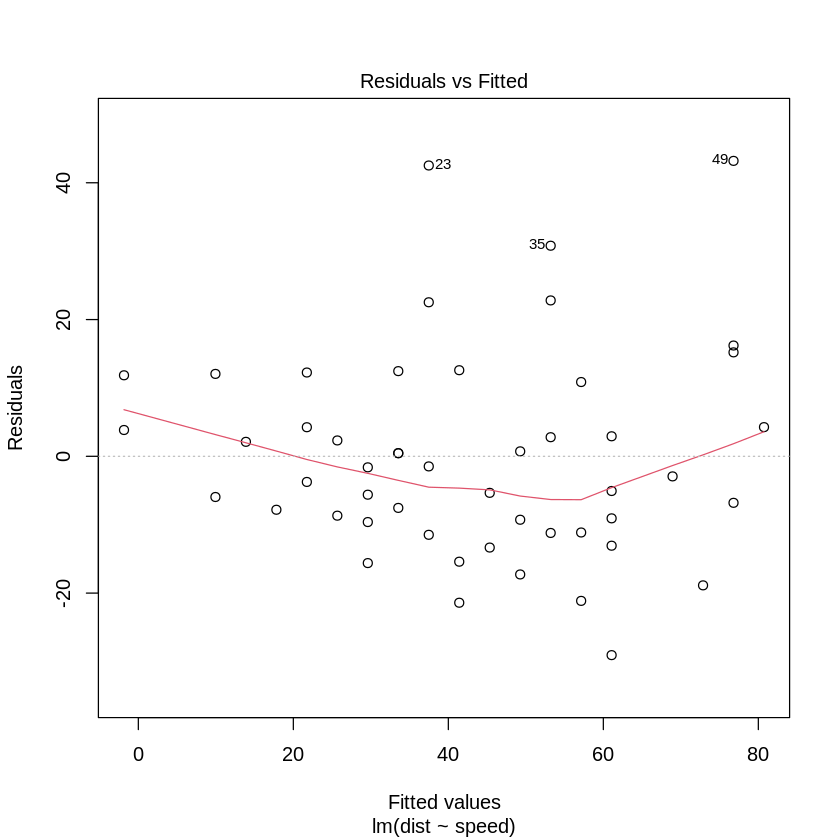

In [128]:
plot(model1, which = 1)

It appears that there is a minor deviation from the linearity assumption. Such deviations can be difficult to detect if you only consider a manually created residuals vs. fitted plot or a scatter plot with the fitted line.

Overall, the linearity assumption seems reasonable here. (Note that in practice, there is generally no "true" linear relationship; rather, we aim for a relationship that can be well approximated by a linear model.)


#### **Homoskedasticity**

Another important assumption of the classical linear regression model is homoskedasticity. It states that the variance of the errors (residuals) is constant across all levels of the predictor(s). A simple way to check this is to examine the residuals vs. fitted values plot or even the original scatter plot. If you notice that the spread of the residuals changes systematically with the fitted values, this indicates a potential violation of the homoskedasticity assumption.

Back to the `cars` example, here, it seems that spread of the residuals slightly increases as the fitted value increases. This suggests heteroskedasticity.

In regression literature, there is a dedicated diagnostic plot for checking homoskedasticity called the **scale-location plot**. You can generate it using `plot(model1, which = 3)`). The theory behind this is out of the scope of this unit. If homoskedasticity and linearity hold, the moving average line should be roughly horizontal. Here, it is not, suggesting heteroskedasticity.


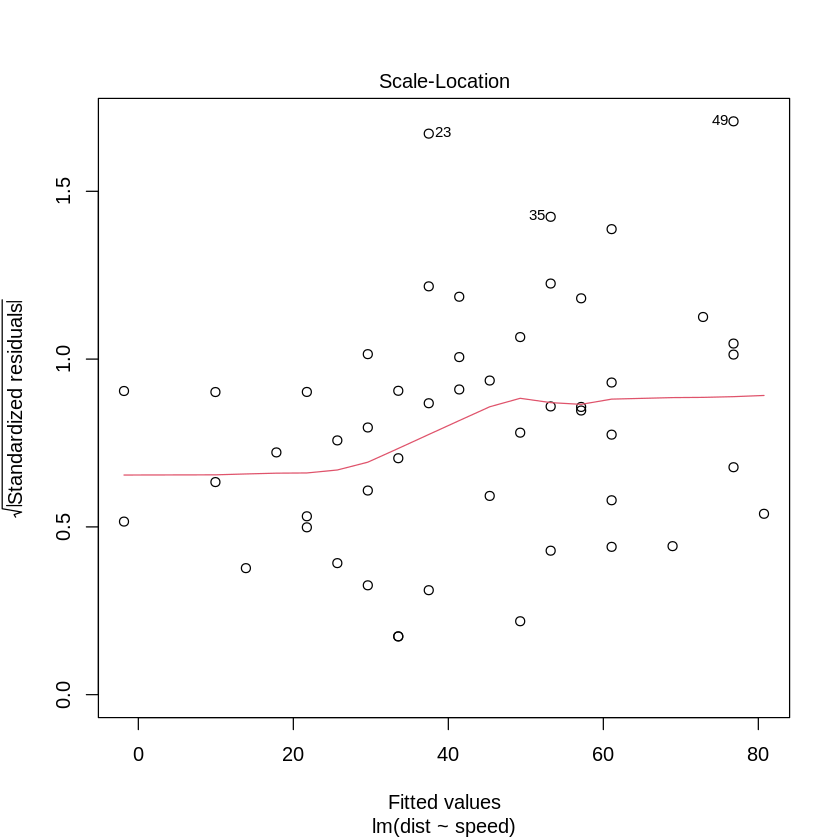

In [129]:
plot(model1, which = 3)

#### **Gaussianity/Normality**

The residuals should be roughly Gaussian if regression assumptions hold. As a results, we may use `qqplot` to check for normality.

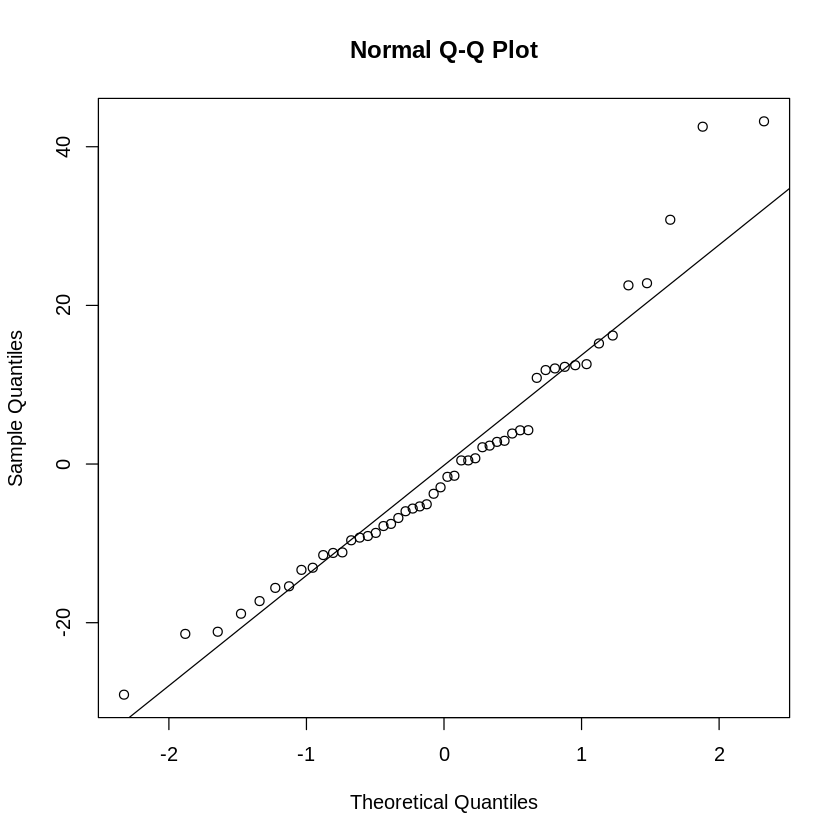

In [130]:
qqnorm(model1$residuals)
qqline(model1$residuals)

From the Q-Q plot, most points lie roughly along the diagonal line, although a few extreme values deviate from it. This indicates a slight departure from normality.

You can use `plot(model1, which = 2)` to generate a similar plot; however, here, residuals are standardised - we won't go into much detail how these have been standardised as this is not the one we learn in this unit. An advantage of this is that it let us convert the scale of the residuals to be that of the standard Gaussian, which makes it easier to interpret (especially when there are outliers).

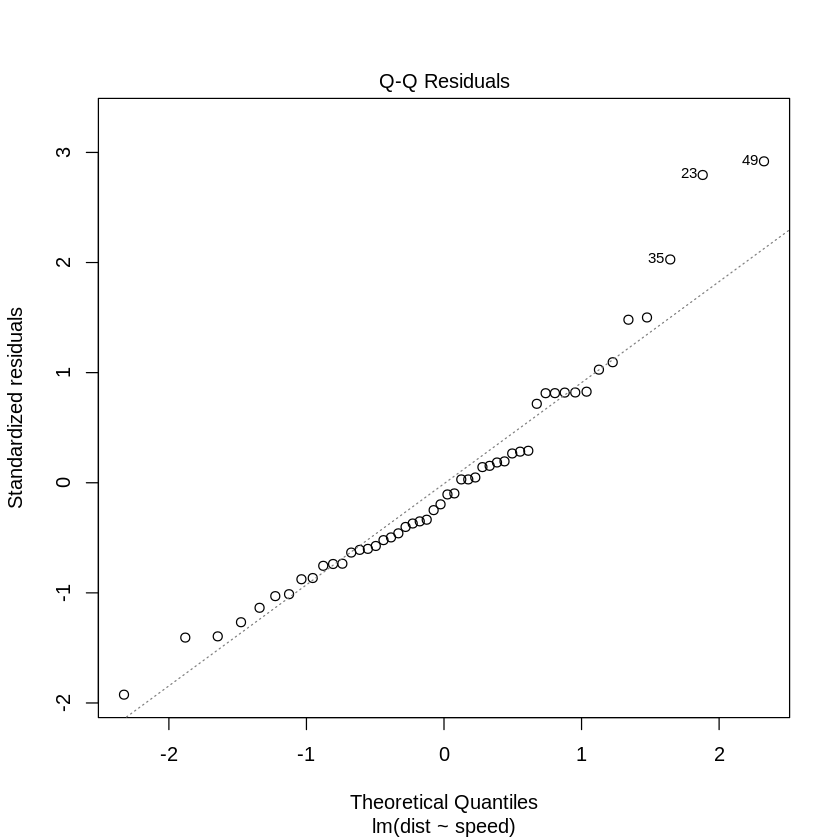

In [131]:
plot(model1, which = 2)

## **Workshop Questions**



### **Question 1: Simpson's Paradox**



> Simpson's paradox is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined. This result is often encountered in social-science and medical-science statistics, and is particularly problematic when frequency data are unduly given causal interpretations.

From [Simpson's Paradox - Wikipedia](https://en.wikipedia.org/wiki/Simpson%27s_paradox)


The following synthetic dataset `typo` (inspired by [Point estimates, Simpson’s paradox, and nonergodicity in biological sciences - Science Direct](https://www.sciencedirect.com/science/article/pii/S0149763421000713?ref=cra_js_challenge&fr=RR-1)) contains information about word per minute (`wpm`) and the number of typos (`typo`) of five typers.



In [133]:
typo = read.csv("./datasets/typo.csv")
typo %>% str()

'data.frame':	100 obs. of  3 variables:
 $ wpm  : num  35.3 37.4 41.5 48.2 34 ...
 $ typo : num  8.63 8.59 9.23 9.53 8.76 ...
 $ typer: chr  "Quinnie" "Quinnie" "Quinnie" "Quinnie" ...


#### **Question 1.1**

We are interested in the linear relationship `typo ~ wpm`. Fit a linear model using the `lm()` function and summarise the result. Interpret the regression coefficient (and the corresponding hypothesis testing output). Does it make any sense?


Call:
lm(formula = typo ~ wpm, data = typo)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83429 -0.60109 -0.06322  0.55628  2.22467 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.944119   0.243577   53.14   <2e-16 ***
wpm         -0.096685   0.003135  -30.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.809 on 98 degrees of freedom
Multiple R-squared:  0.9066,	Adjusted R-squared:  0.9056 
F-statistic: 951.2 on 1 and 98 DF,  p-value: < 2.2e-16



<details>
<summary>▶️ Click to show the solution</summary>

```r
lm(typo~wpm, typo) -> model3
summary(model3)
```

The p-value associated to `wpm` is extremely small, suggesting a significant linear relationship between `typo` and `wpm`. The estimated coefficient is roughly -0.097, implying that for an additional `wpm`, a typer typically reduce the number of errors by roughly 0.097, which does not make any sense.


</details>

#### **Question 1.2**

Create a scatter plot of `typo` vs. `wpm` with fitted `lm` lines, segmented (coloured) by `typer`. What do you observe?


<details>
<summary>▶️ Click to show the solution</summary>

```r
typo %>%
  ggplot(aes(x = wpm, y = typo, colour = typer)) +
  geom_point() +
  geom_smooth(method = "lm")

```

If we do not take into account `typer`, it appears that as `wpm` increases, `typo` decreases, which does not make sense. However, within each group (`typer`), the direction of the linear relationship reverses - a classic example of Simpson's paradox.

</details>

#### **Question 1.3**

One may be interested in running a **post-hoc ANCOVA** to check if there are significant differences in `typo` across `typer`, **after controlling for `wpm`**.  Perform ANCOVA in R and interpret the summarised results.

**Hint**: You can use the `aov()` function (similar to ANOVA) on the model `typo ~ wpm + typer` (without interaction). See the previous workshop for two-way ANOVA.  

In [139]:

model4 = aov(typo ~ wpm + typer, data = typo)
summary(model4)



            Df Sum Sq Mean Sq F value Pr(>F)    
wpm          1  622.6   622.6 10432.8 <2e-16 ***
typer        4   58.5    14.6   245.2 <2e-16 ***
Residuals   94    5.6     0.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


<details>
<summary>▶️ Click to show the solution</summary>

```r

model4 = aov(typo ~ wpm + typer, data = typo)
summary(model4)
```

The extremely small p-value associated with typer indicates that there are significant differences in the number of `typo` across different `typer` after controlling for `wpm`.

Similarly, the very small p-value for `wpm` suggests a significant linear relationship between `wpm` and `typo`, even after adjusting for `typer`.

Of course, sometimes after controlling for one variable, you may find no remaining linear relationship in another predictor - even if, when fitted alone, it appeared to have a strong association. This highlights the importance of considering multiple predictors together. You will see more about multiple linear regression in future units.

</details>